**This notebook calculates the correlation between Covid 7-day incidence (as reported on 16th Dec 2020) in the German Landkreise (districts) and the 2017 voting outcome of the right-wing party AfD in the Bundestag (state parliament).**

Sources: 
https://www.regionalstatistik.de/genesis//online?operation=table&code=14111-01-03-4&bypass=true&levelindex=0&levelid=1608119964109#abreadcrumb
https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Daten/Fallzahlen_Kum_Tab.html on 16/12/2020
        

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
landkreise = pd.read_csv("regionalstatistik_btw17_landkreise.csv", header=2, index_col=0)
# column 2: Wahlbeteiligung
covidcases = pd.read_csv("fallzahlen_161220.csv", header=3, dtype=str)
covidcases = covidcases.set_index('LKNR')
landkreise

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,CDU/CSU,SPD,GRÜNE,FDP,DIE LINKE,AfD,Sonstige Parteien
NaN,NaN,Anzahl,Prozent,Anzahl,Anzahl,Anzahl,Anzahl,Anzahl,Anzahl,Anzahl,Anzahl
DG,Deutschland,61688485,76.2,46515492,15317344,9539381,4158400,4999449,4297270,5878115,2325533
01,Schleswig-Holstein,2266012,76.3,1715641,583135,399505,205471,216844,124678,140362,45646
01001,"Flensburg, Kreisfreie Stadt",70105,70.9,49271,13382,12142,7416,5073,5699,3702,1857
01002,"Kiel, Landeshauptstadt, Kreisfreie Stadt",186988,74.1,137368,35525,33093,23995,15697,14699,9524,4835
...,...,...,...,...,...,...,...,...,...,...,...
"die Partei ""PDS"" und vom 17.07.2005 bis einschließlich",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"15.06.2007 die Partei ""Die Linke."" nachgewiesen.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"© Statistische Ämter des Bundes und der Länder, Deutschland, 2020.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dieses Werk ist lizenziert unter der Datenlizenz Deutschland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
covidcases

,Landkreis,Anzahl,Inzidenz
LKNR,,,
05334,StadtRegion Aachen,867,156
07131,LK Ahrweiler,134,103
09771,LK Aichach-Friedberg,164,122
08425,LK Alb-Donau-Kreis,370,188
16077,LK Altenburger Land,418,468
...,...,...,...
09663,SK Würzburg,105,82
09679,LK Würzburg,117,72
08417,LK Zollernalbkreis,340,180


In [4]:
# join the two dataframes on the LKNR column
covidcases = covidcases.join(landkreise['AfD'])

In [5]:
plot_data = covidcases[['Inzidenz', 'AfD']].dropna().astype(int)
plot_data

,Inzidenz,AfD
01001,52,3702
01002,109,9524
01003,171,10461
01004,89,4124
01051,65,6626
...,...,...
16073,266,18010
16074,209,12278
16075,385,13452
16076,265,16203


Pearson-Korrelation: 0.36793325640499525


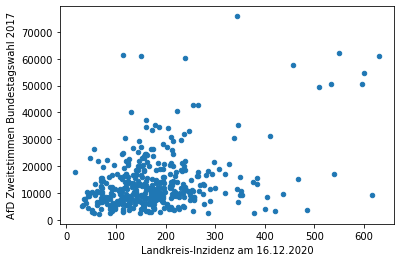

In [6]:
%matplotlib inline
plot_data.plot.scatter('Inzidenz', 'AfD')
plt.xlabel("Landkreis-Inzidenz am 16.12.2020")
plt.ylabel("AfD Zweitstimmen Bundestagswahl 2017")

print("Pearson-Korrelation:", plot_data['Inzidenz'].corr(plot_data['AfD']))